In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '20250107_NH3_N2'
file = os.listdir(path)
# file.pop(0)

# find a file where an intensity peak appears
max_val = []
for i in range(len(file)):
    df_temp = pd.read_csv(path+'/'+file[i], index_col='Time')
    max_val.append(df_temp.max(axis=1).max())
pd.Series(max_val)

0       155.0
1       162.0
2       154.0
3       442.0
4      4699.0
        ...  
130     153.0
131     151.0
132     162.0
133     153.0
134     157.0
Length: 135, dtype: float64

In [4]:
pd.Series(max_val).to_csv('file/process2/process2_max.csv')

In [5]:
df5 = pd.read_csv(path+'/'+file[5], index_col='Time')
df6 = pd.read_csv(path+'/'+file[6], index_col='Time')
df7 = pd.read_csv(path+'/'+file[7], index_col='Time')
print(df5.shape, df6.shape)
df5.head()

(123, 2048) (123, 2048)


,49.750000,50.250000,50.750000,51.250000,51.760000,52.260000,52.760000,53.260000,53.760000,54.260000,...,1186.380000,1186.990000,1187.590000,1188.200000,1188.810000,1189.410000,1190.020000,1190.630000,1191.240000,1191.840000
Time,,,,,,,,,,,,,,,,,,,,,
0.000,-38.0,-13.0,5.0,13.0,-1.0,39.0,8.0,3.0,-8.0,-21.0,...,-12.0,2.0,-24.0,1.0,-9.0,50.0,-2.0,-22.0,-16.0,-11.0
0.501,-37.0,-28.0,23.0,2.0,16.0,34.0,13.0,-1.0,-20.0,-15.0,...,-20.0,-2.0,-23.0,9.0,5.0,38.0,-13.0,-23.0,-23.0,15.0
1.102,-34.0,-25.0,21.0,13.0,5.0,38.0,-8.0,-2.0,-6.0,-17.0,...,-21.0,-7.0,-12.0,9.0,0.0,44.0,-6.0,-20.0,-20.0,-8.0
1.602,-37.0,-5.0,24.0,12.0,27.0,40.0,9.0,-3.0,-7.0,-21.0,...,-14.0,-2.0,-11.0,4.0,4.0,51.0,-7.0,-33.0,-22.0,7.0
2.102,-40.0,-23.0,14.0,5.0,32.0,40.0,10.0,-1.0,5.0,-20.0,...,-22.0,-5.0,-12.0,18.0,7.0,63.0,-5.0,-28.0,-22.0,7.0


In [10]:
with open("oes_sampling_500.txt", 'w') as output:
    for row in df5.index:
        output.write(str(row) + '\n')

In [6]:
def DropFromSecond(x):
    x = x * 100
    x = np.floor(x)
    return x/100

df5_new_cols = [str(DropFromSecond(x)) for x in df5.columns.astype(float)]
df5.columns = df5_new_cols
df6.columns = df5_new_cols
df7.columns = df5_new_cols

# concatenate the two
df = pd.concat([df5, df6, df7], ignore_index=True)
print(df.shape)

df.index = [0.6*i for i in range(len(df.index))]

df.head()

(369, 2048)


,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
0.0,-38.0,-13.0,5.0,13.0,-1.0,39.0,8.0,3.0,-8.0,-21.0,...,-12.0,2.0,-24.0,1.0,-9.0,50.0,-2.0,-22.0,-16.0,-11.0
0.6,-37.0,-28.0,23.0,2.0,16.0,34.0,13.0,-1.0,-20.0,-15.0,...,-20.0,-2.0,-23.0,9.0,5.0,38.0,-13.0,-23.0,-23.0,15.0
1.2,-34.0,-25.0,21.0,13.0,5.0,38.0,-8.0,-2.0,-6.0,-17.0,...,-21.0,-7.0,-12.0,9.0,0.0,44.0,-6.0,-20.0,-20.0,-8.0
1.8,-37.0,-5.0,24.0,12.0,27.0,40.0,9.0,-3.0,-7.0,-21.0,...,-14.0,-2.0,-11.0,4.0,4.0,51.0,-7.0,-33.0,-22.0,7.0
2.4,-40.0,-23.0,14.0,5.0,32.0,40.0,10.0,-1.0,5.0,-20.0,...,-22.0,-5.0,-12.0,18.0,7.0,63.0,-5.0,-28.0,-22.0,7.0


In [7]:
x = range(len(df.index))
y = range(len(df.columns))

# replace negative values with zero
for i in range(len(df.index)):
    for j in y:
        if df.iloc[i,j]<=1:
            df.iloc[i,j]=0
        else:
            df.iloc[i,j] = np.log(df.iloc[i,j])

# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(df.columns).reshape(-1, 1))
y = mm.transform(np.array(df.columns).reshape(-1, 1)).flatten() * 1142 + 50

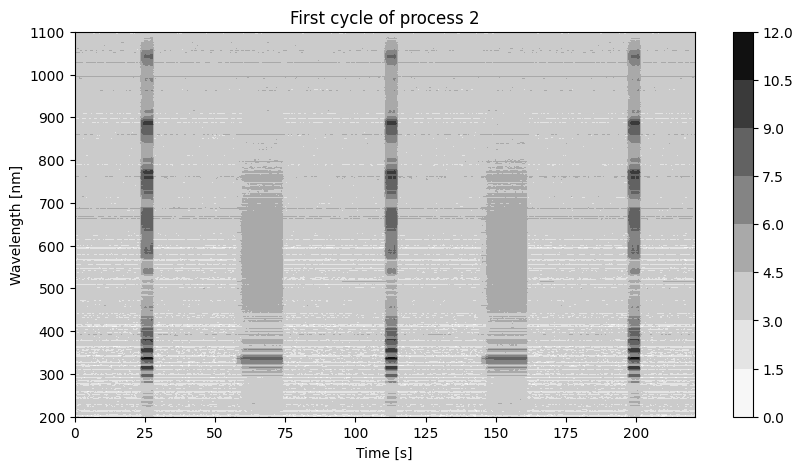

In [8]:
X, Y = np.meshgrid([0.6*i for i in range(len(df.index))], y)
Z = df.T

plt.figure(figsize=(10,5))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('First cycle of process 2')
plt.colorbar()
plt.show()

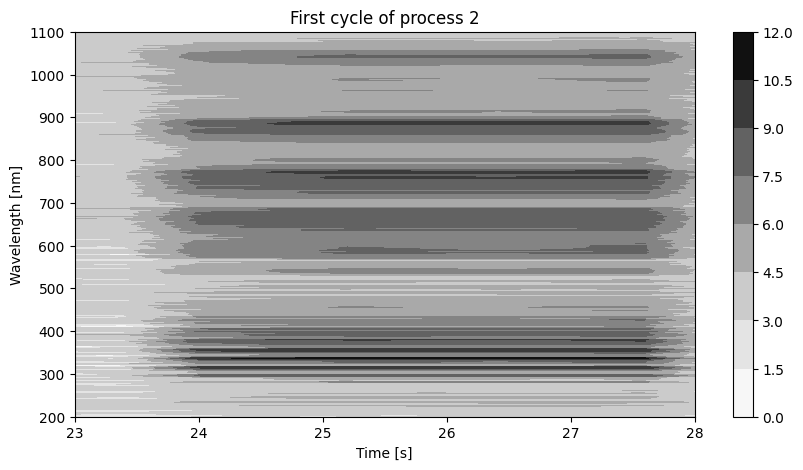

In [9]:
plt.figure(figsize=(10,5))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(23,28)
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('First cycle of process 2')
plt.colorbar()
plt.show()

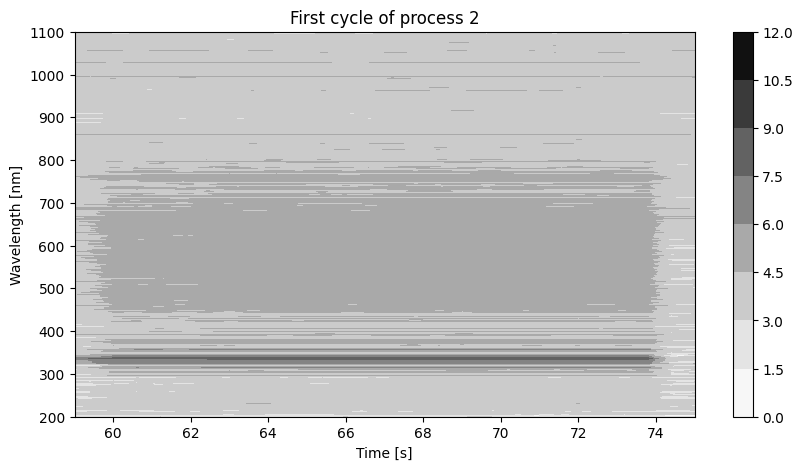

In [11]:
plt.figure(figsize=(10,5))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(59,75)
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('First cycle of process 2')
plt.colorbar()
plt.show()

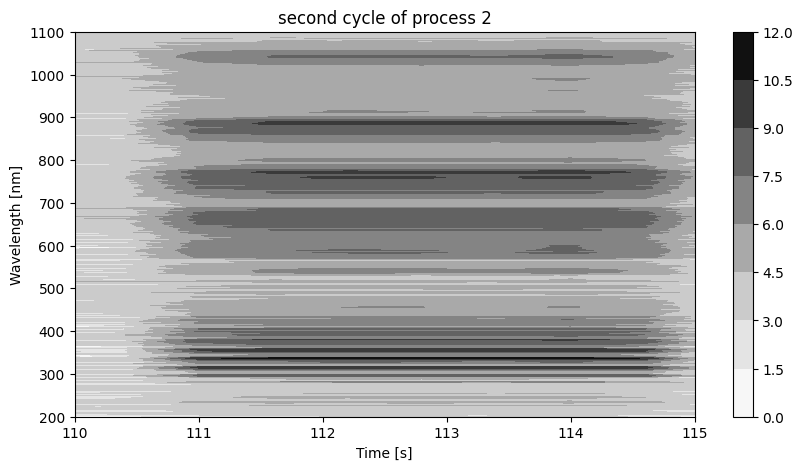

In [12]:
plt.figure(figsize=(10,5))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(110,115)
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('second cycle of process 2')
plt.colorbar()
plt.show()

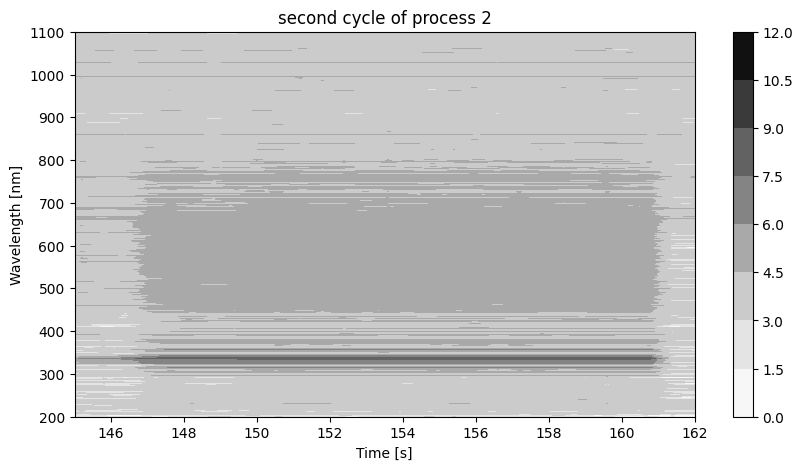

In [14]:
plt.figure(figsize=(10,5))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(145,162)
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('second cycle of process 2')
plt.colorbar()
plt.show()